In [113]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
import os 

In [115]:
os.listdir(r"C:\Users\20190855029\data_ML\titanic")[1]

'test (1).csv'

In [116]:
path = "C:/Users/20190855029/data_ML/titanic/"

In [117]:
train_df = pd.read_csv(path+os.listdir(path)[2])
test_df = pd.read_csv(path+os.listdir(path)[1])


In [118]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Variable classes

In [121]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
train_df.shape[0]

891

In [123]:
train_df.drop(["Cabin"],axis=1,inplace=True)

In [124]:
test_df.drop(["Cabin"],axis=1,inplace=True)

## Visualizing

## Temel Veri Analizi 

In [125]:
variable = "Sex"
var = train_df[variable]
var_value_count = var.value_counts()

In [126]:
var_value_count

Sex
male      577
female    314
Name: count, dtype: int64

In [127]:
var.unique()

array(['male', 'female'], dtype=object)

### Çıkarım yapıyoruz: İlk gözlemde görselleştirme için değişken değer türleri fazla olmayan değişkenler seçilip görselleştirilmeli(thresh = 10)

In [128]:
#kategorik deişkenlerin görselleştirilmesinde bar yöntemi etkilidir.
import matplotlib.pyplot as plt
def bar_plot(variable):
    var = train_df[variable]
    var_value_count = var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(var_value_count.index,var_value_count)
    plt.xticks(var_value_count.index, var_value_count.index.values)   
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_value_count))

In [129]:
category = []
for i in train_df.columns:
    var_count = train_df[i].nunique()
    if var_count< 10:
        category.append(i)

In [130]:
category

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

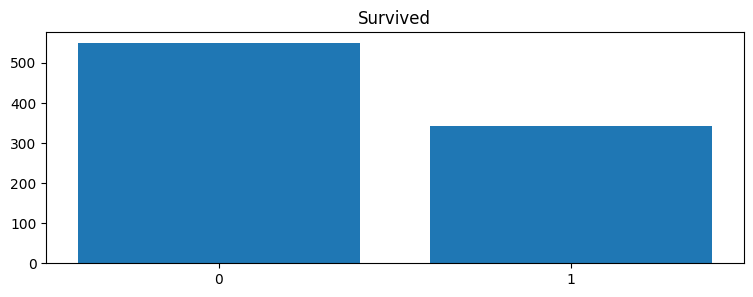

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


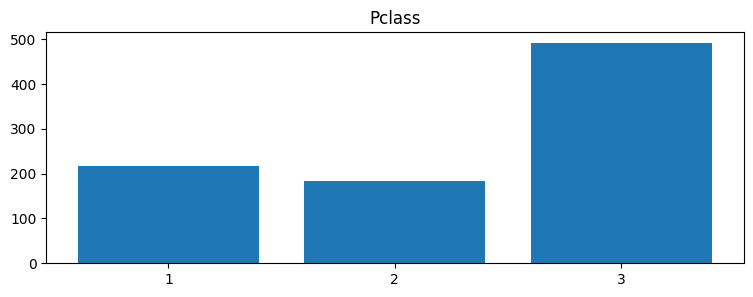

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


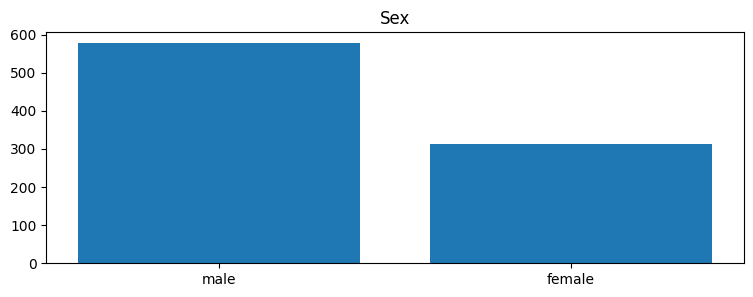

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


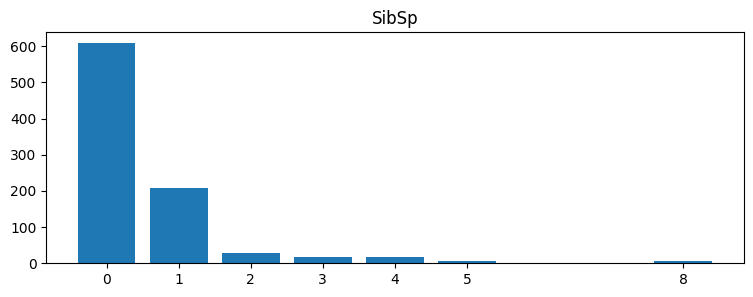

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


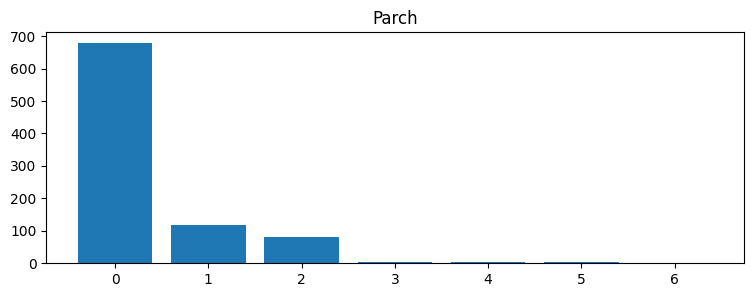

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


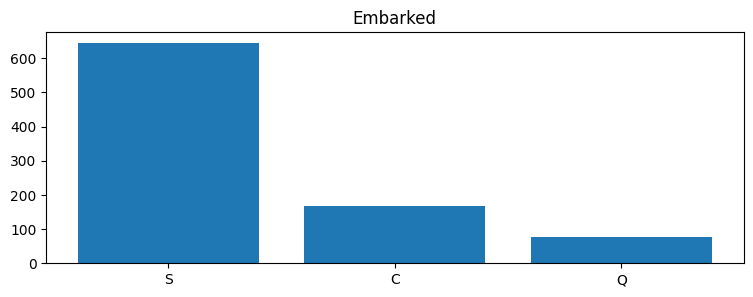

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [131]:
for c in category:
    bar_plot(c)


In [132]:
numeric = ["Fare","Age","PassengerId"]

In [133]:
def plt_hist(variable):
    var = train_df[variable]
    plt.figure(figsize=(9,3))
    plt.hist(var,bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

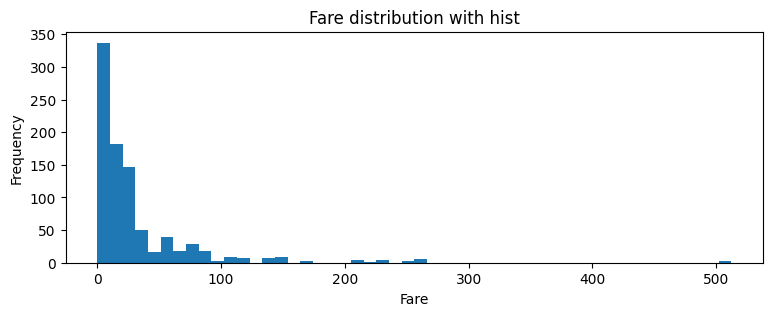

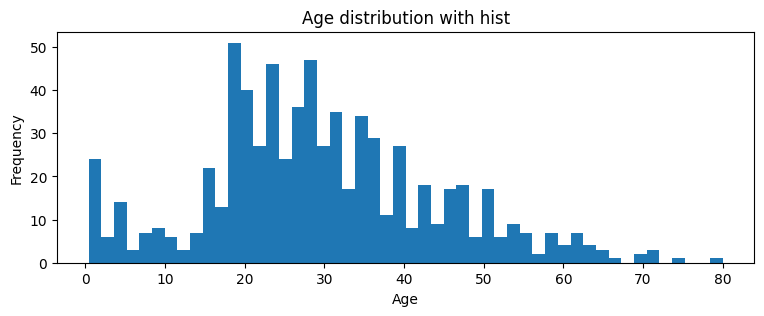

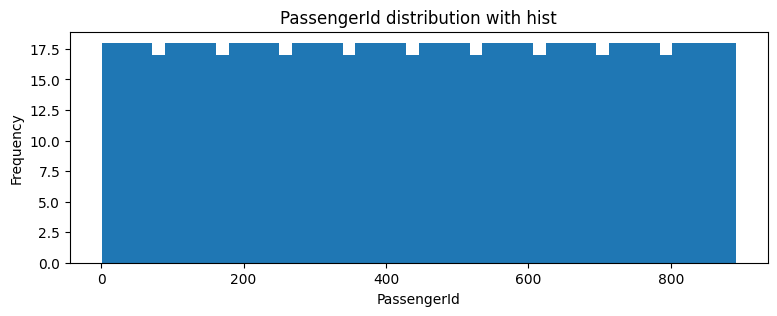

In [134]:
for i in numeric:
    plt_hist(i)

In [135]:
train_df.drop(["PassengerId"],axis=1, inplace=True)

In [136]:
test_df.drop(["PassengerId"],axis=1, inplace=True)

## Basic Data Analysis


In [137]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [138]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [139]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [140]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [141]:
from collections import Counter

### Aykırı Değer Tespiti

In [142]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [143]:
train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0,inplace=True)

In [144]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Boş Değer Tespiti

In [145]:
train_len = train_df.shape[0]
data = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [146]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1294,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1295,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1296,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1297,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
1298,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [147]:
data.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         256
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

In [148]:
data[data.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1033,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

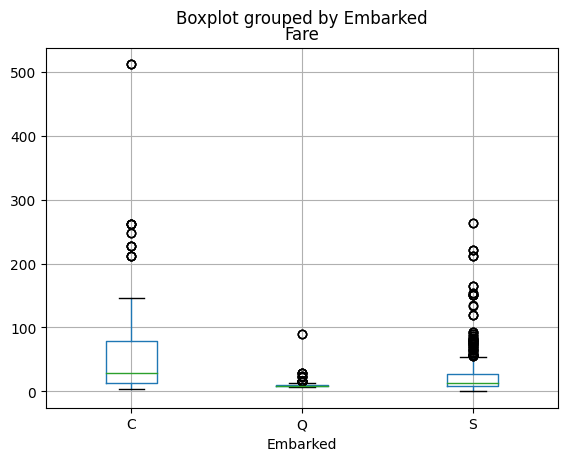

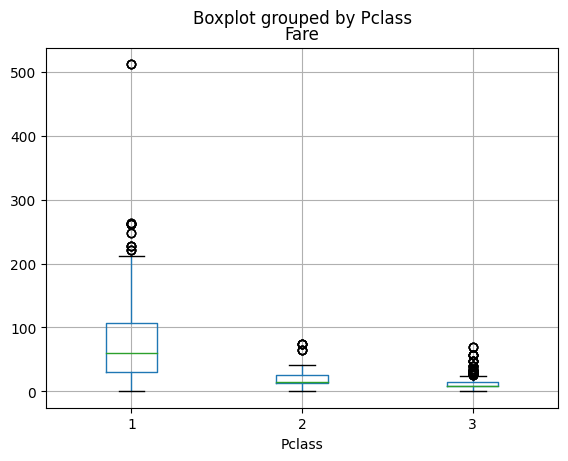

In [149]:
#Fare değerini etkilicek önemli değişkenlerden Pclass ve Embarked var.
data.boxplot(column="Fare",by = "Embarked")
data.boxplot(column="Fare",by= "Pclass")

In [150]:
data[data["Pclass"] == 3].Fare.mean()

12.741219971469329

In [151]:
data[data["Embarked"] == "S"].Fare.mean()

26.309563898117386

In [152]:
data.Fare.fillna(20,inplace=True)

In [153]:
data[data.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [154]:
data[data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
60,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
821,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [155]:
a=data.Embarked[data.Pclass == 1]
a.describe()

count     318
unique      3
top         S
freq      174
Name: Embarked, dtype: object

In [156]:
data.Embarked.fillna("S",inplace=True)

In [157]:
data[data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Big Visualization

In [158]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]

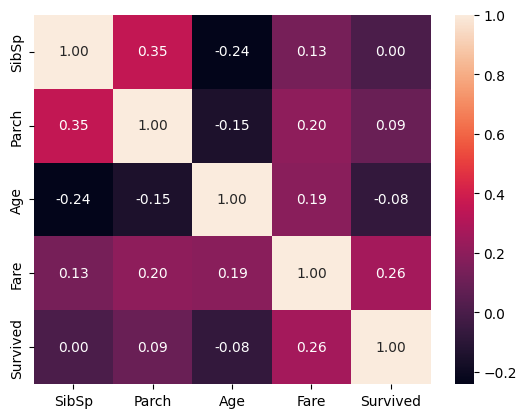

In [159]:
import seaborn as sns
sns.heatmap(data[list1].corr(),annot=True,fmt=".2f")
plt.show()

### SibSp -- Survived || Parch -- Survived || Pclass -- Survived || Embarked -- Survived


In [160]:
def visualization(independent_var):
    g = sns.catplot(x=independent_var,y="Survived",data=data, kind="bar")
    g.set_ylabels("Survived Probability")
    plt.show()

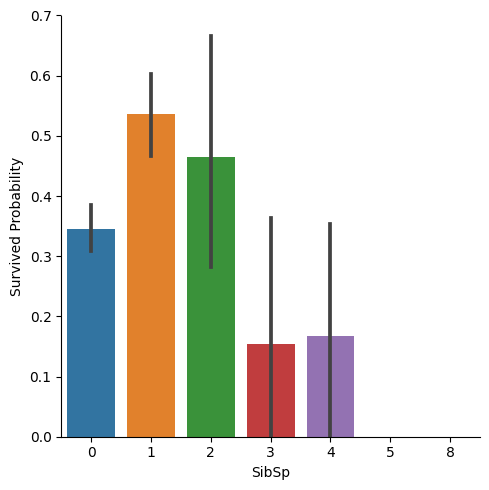

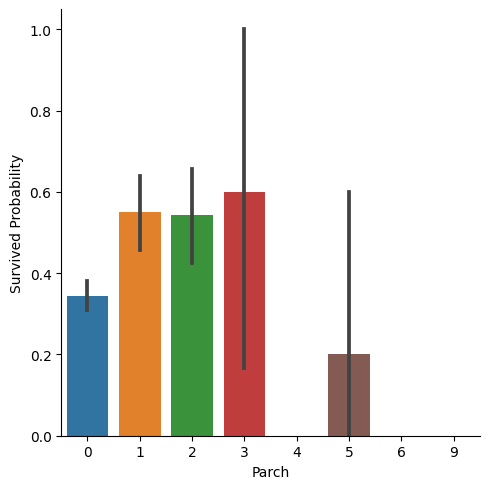

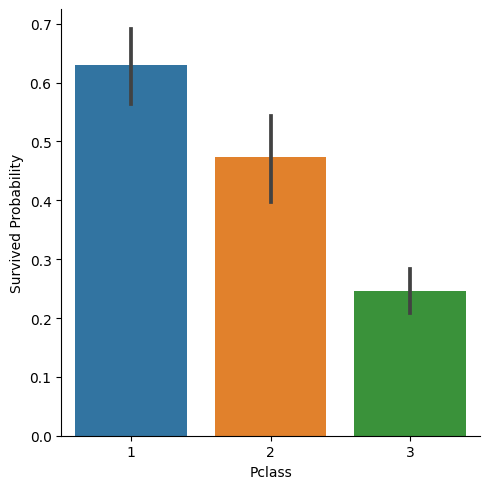

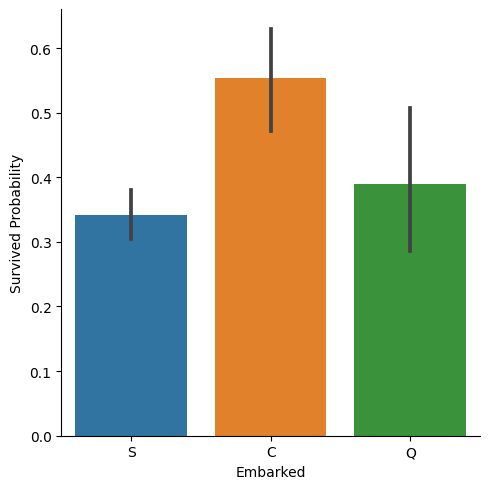

In [161]:
list_vis = ["SibSp", "Parch", "Pclass","Embarked"]
for i in list_vis:
    visualization(i)

### Age -- Survived

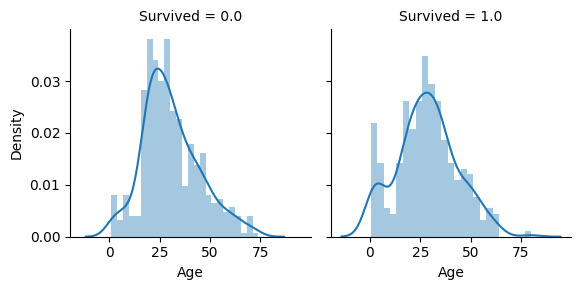

In [162]:
g = sns.FacetGrid(data,col="Survived")
g.map(sns.distplot,"Age",bins=25)
plt.show()

### Pclass -- Survived -- Age

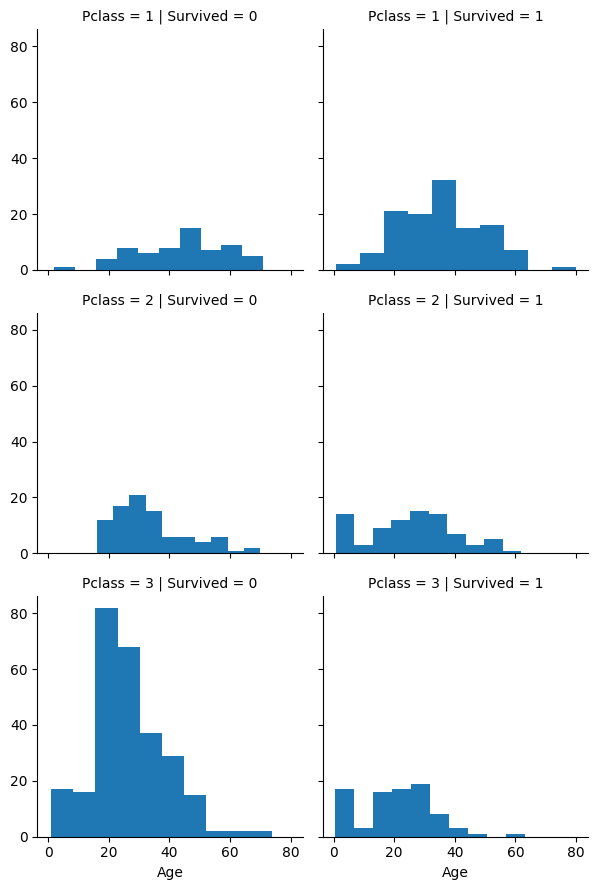

In [163]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age")
g.add_legend()
plt.show()

### Embarked -- Sex -- Pclass -- Survived

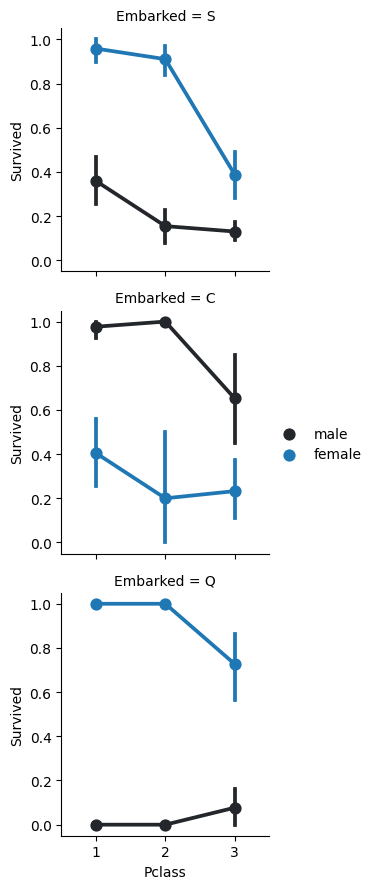

In [164]:
g = sns.FacetGrid(data,row="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

### Embarked -- Sex -- Fare -- Survived

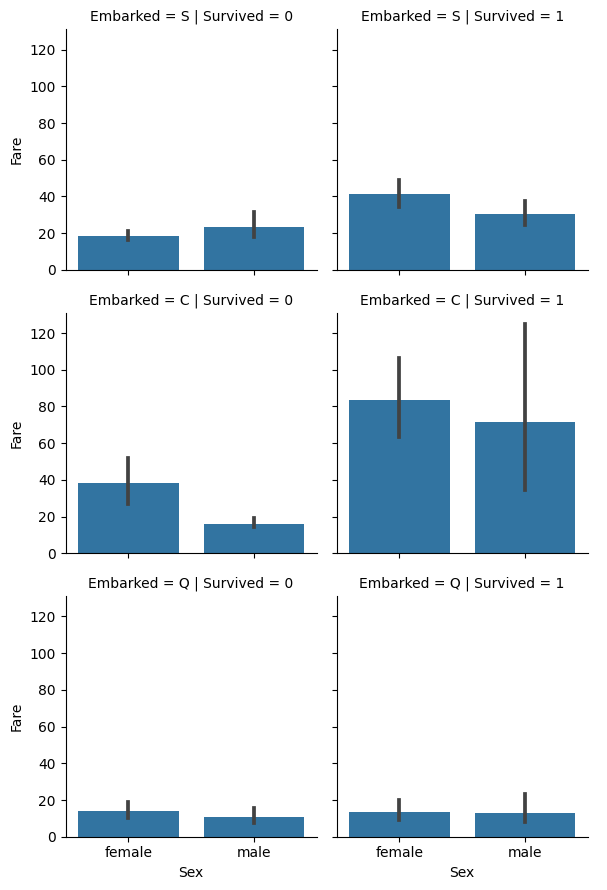

In [165]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

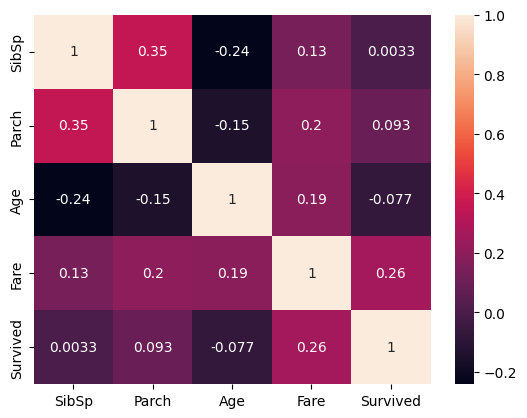

In [166]:
sns.heatmap(data[['SibSp', 'Parch', 'Age', 'Fare', 'Survived']].corr(),annot=True)
plt.show()

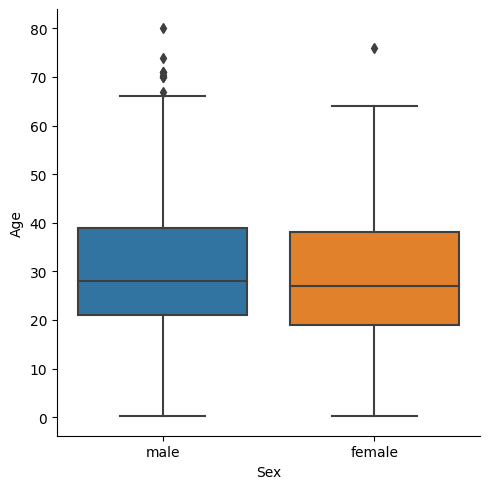

In [167]:
sns.catplot(x="Sex",y="Age",data=data,kind="box")
plt.show()

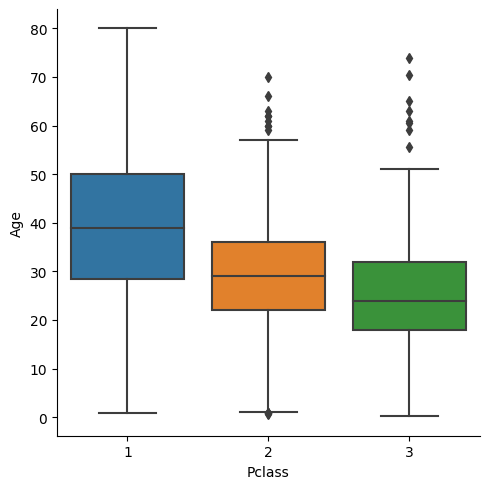

In [168]:
sns.catplot(x="Pclass",y="Age",data=data,kind="box")
plt.show()

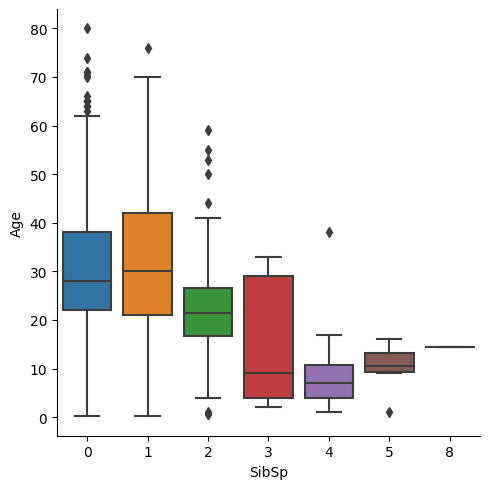

In [169]:
sns.catplot(x="SibSp",y="Age",data=data,kind="box")
plt.show()

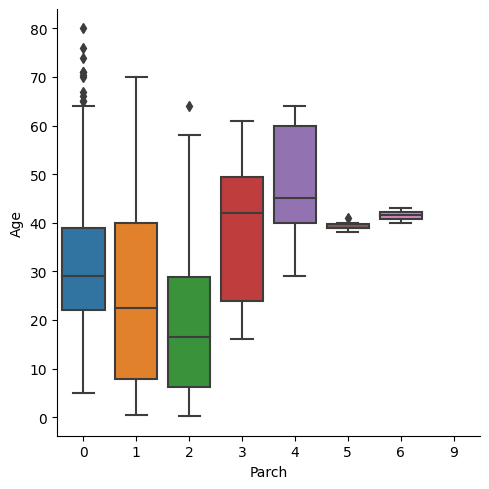

In [170]:
sns.catplot(x="Parch",y="Age",data=data,kind="box")
plt.show()

In [171]:
index_na = list(data["Age"][data["Age"].isnull()].index)

In [172]:
import numpy as np

In [173]:
index_nan_age = list(data["Age"][data["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = data["Age"][((data["SibSp"] == data.iloc[i]["SibSp"]) &(data["Parch"] == data.iloc[i]["Parch"])& (data["Pclass"] == data.iloc[i]["Pclass"]))].median()
    age_med = data["Age"].median()
    if not np.isnan(age_pred):
        data["Age"].iloc[i] = age_pred
    else:
        data["Age"].iloc[i] = age_med

In [174]:
data.Age.isnull().sum()

0

# Feature Engineering

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    float64
 1   Pclass    1299 non-null   int64  
 2   Name      1299 non-null   object 
 3   Sex       1299 non-null   object 
 4   Age       1299 non-null   float64
 5   SibSp     1299 non-null   int64  
 6   Parch     1299 non-null   int64  
 7   Ticket    1299 non-null   object 
 8   Fare      1299 non-null   float64
 9   Embarked  1299 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 101.6+ KB


In [176]:
data.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [177]:
# satırımızı . ya göre ayırıyoruz.
data["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in data.Name]#i.split(".")[0] yapınca ilk indisi alıyor


In [178]:
data.Title.describe()

count     1299
unique      18
top         Mr
freq       753
Name: Title, dtype: object

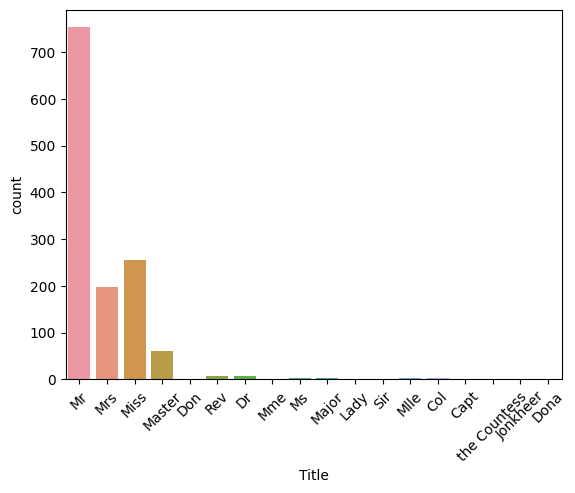

In [179]:
sns.countplot(x="Title",data=data)
plt.xticks(rotation = 45)# x ekseni üzerinde işlemler yaptırıyor
plt.show()

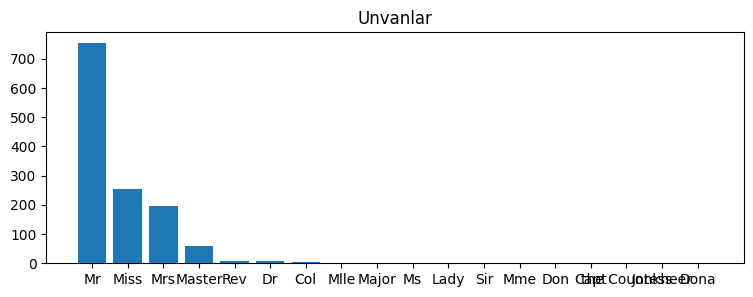

In [180]:
plt.figure(figsize=(9,3))
plt.bar(data.Title.value_counts().index,data.Title.value_counts())
plt.xticks(data.Title.value_counts().index, data.Title.value_counts().index.values)   
plt.title("Unvanlar")
plt.show()

In [181]:
title_count = data.Title.value_counts()

In [182]:
over_50 = data.Title.value_counts() >50
below_50 = data.Title.value_counts() <50

In [183]:
selected_titles = title_count.index[over_50].tolist()

In [184]:
selected_titles

['Mr', 'Miss', 'Mrs', 'Master']

In [185]:
selected_other_titles = title_count.index[below_50].tolist()

In [186]:
selected_other_titles

['Rev',
 'Dr',
 'Col',
 'Mlle',
 'Major',
 'Ms',
 'Lady',
 'Sir',
 'Mme',
 'Don',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [187]:
data.Title= data.Title.replace(selected_other_titles,'other')

In [188]:
data.drop(["Name"],axis=1,inplace=True)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  881 non-null    float64
 1   Pclass    1299 non-null   int64  
 2   Sex       1299 non-null   object 
 3   Age       1299 non-null   float64
 4   SibSp     1299 non-null   int64  
 5   Parch     1299 non-null   int64  
 6   Ticket    1299 non-null   object 
 7   Fare      1299 non-null   float64
 8   Embarked  1299 non-null   object 
 9   Title     1299 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 101.6+ KB


In [190]:
data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

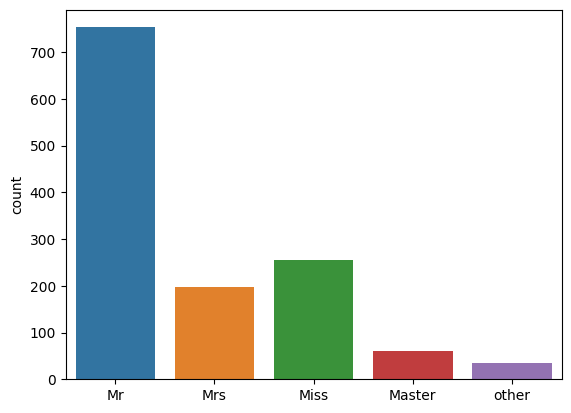

In [191]:
sns.countplot(x=data.Title.values,data=data)
plt.show()

In [192]:
pd.get_dummies(data,columns=["Title"],dtype="int64")

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0
3,1.0,1,female,35.0,1,0,113803,53.1000,S,0,0,0,1,0
4,0.0,3,male,35.0,0,0,373450,8.0500,S,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,3,male,25.0,0,0,A.5. 3236,8.0500,S,0,0,1,0,0
1295,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,1
1296,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,1,0,0
1297,NaN,3,male,25.0,0,0,359309,8.0500,S,0,0,1,0,0


#### Family Size

In [193]:
data["Fsize"] = data["SibSp"] + data["Parch"] + 1

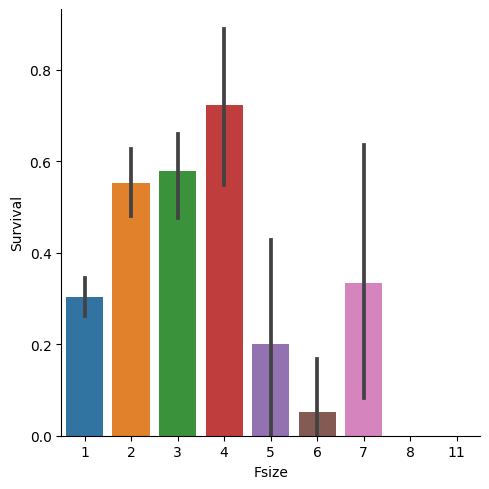

In [194]:
g = sns.catplot(x = "Fsize", y = "Survived", data = data, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [195]:
data.Fsize.describe()

count    1299.000000
mean        1.825250
std         1.427048
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: Fsize, dtype: float64

In [196]:
data["family_size"] = np.arange(data.shape[0])

In [197]:
data.family_size[5]

5

In [198]:
for id, i in enumerate(data["Fsize"]):
    if i ==5 or i == 6 : 
        data.family_size[id] = 2
    elif i ==1 or i == 7 :
        data.family_size[id] = 1
    else:
        data.family_size[id] = 0

In [199]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,family_size
1294,NaN,3,male,25.0,0,0,A.5. 3236,8.0500,S,Mr,1,1
1295,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,other,1,1
1296,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,1,1
1297,NaN,3,male,25.0,0,0,359309,8.0500,S,Mr,1,1
1298,NaN,3,male,16.0,1,1,2668,22.3583,C,Master,3,0


In [200]:
data.family_size.value_counts()

family_size
1    806
0    449
2     44
Name: count, dtype: int64

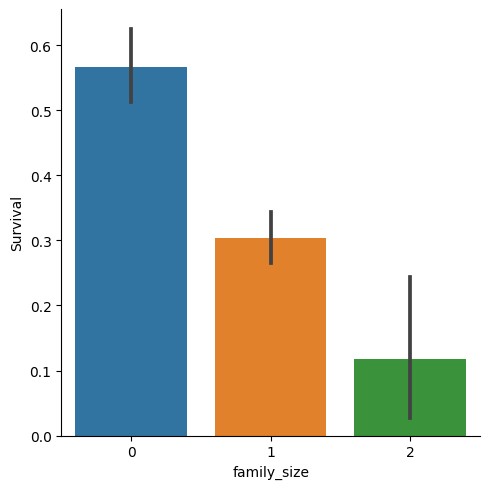

In [201]:
g = sns.catplot(x = "family_size", y = "Survived", data = data, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     881 non-null    float64
 1   Pclass       1299 non-null   int64  
 2   Sex          1299 non-null   object 
 3   Age          1299 non-null   float64
 4   SibSp        1299 non-null   int64  
 5   Parch        1299 non-null   int64  
 6   Ticket       1299 non-null   object 
 7   Fare         1299 non-null   float64
 8   Embarked     1299 non-null   object 
 9   Title        1299 non-null   object 
 10  Fsize        1299 non-null   int64  
 11  family_size  1299 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 116.8+ KB


In [203]:
data = pd.get_dummies(data, columns= ["family_size"],dtype="int64")

In [204]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,family_size_0,family_size_1,family_size_2
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,1,0,0
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,1,0,0
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,0,1,0
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,1,0,0
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,0,1,0


In [205]:
data = pd.get_dummies(data, columns= ["Fsize"],dtype="int64")

In [206]:
data = pd.get_dummies(data, columns= ["Embarked"],dtype="int64")

In [207]:
data = pd.get_dummies(data, columns= ["Sex"],dtype="int64")
data = pd.get_dummies(data, columns= ["Pclass"],dtype="int64")

In [208]:
data = pd.get_dummies(data, columns= ["Title"],dtype="int64")

In [209]:
data.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,0.0,22.0,1,0,A/5 21171,7.2500,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1.0,38.0,1,0,PC 17599,71.2833,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1.0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
3,1.0,35.0,1,0,113803,53.1000,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.0,35.0,0,0,373450,8.0500,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [210]:
data.drop(["Ticket"],axis=1,inplace=True)

In [211]:
data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size_0',
       'family_size_1', 'family_size_2', 'Fsize_1', 'Fsize_2', 'Fsize_3',
       'Fsize_4', 'Fsize_5', 'Fsize_6', 'Fsize_7', 'Fsize_8', 'Fsize_11',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_other'],
      dtype='object')

# Modeling

In [212]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [213]:
len(data.loc[:train_len,:])

882

In [214]:
train_df = data.loc[:train_len-1,:]
test_df = data.loc[train_len:,:]

In [215]:
test_df.head()

,Survived,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
881,NaN,34.5,0,0,7.8292,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
882,NaN,47.0,1,0,7.0000,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
883,NaN,62.0,0,0,9.6875,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
884,NaN,27.0,0,0,8.6625,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
885,NaN,22.0,1,1,12.2875,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [216]:
test_df.drop("Survived",axis=1,inplace = True)

In [223]:
test_df.head()

,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,Fsize_3,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
881,34.5,0,0,7.8292,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
882,47.0,1,0,7.0000,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
883,62.0,0,0,9.6875,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
884,27.0,0,0,8.6625,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
885,22.0,1,1,12.2875,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [224]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,0.0,22.0,1,0,7.2500,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1.0,38.0,1,0,71.2833,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,1.0,35.0,1,0,53.1000,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [225]:
y = train_df.Survived

In [226]:
x = train_df.drop(["Survived"],axis=1)

In [227]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [228]:
x.shape

(881, 29)

In [229]:
x.head()

,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,Fsize_3,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,22.0,1,0,7.2500,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,38.0,1,0,71.2833,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,35.0,1,0,53.1000,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [230]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [231]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.58
Testing Accuracy: % 83.26


### Hyperparameter Tuning -- Grid Search -- Cross Validation

In [232]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state,probability=True),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]
                 }

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [233]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

In [234]:
import time
times = time.time()
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], 
        cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", 
        n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])
print(time.time()-times)  

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8242424242424242
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8121212121212121
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8424242424242424
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8166666666666667
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7787878787878788
25.216841459274292


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabels'

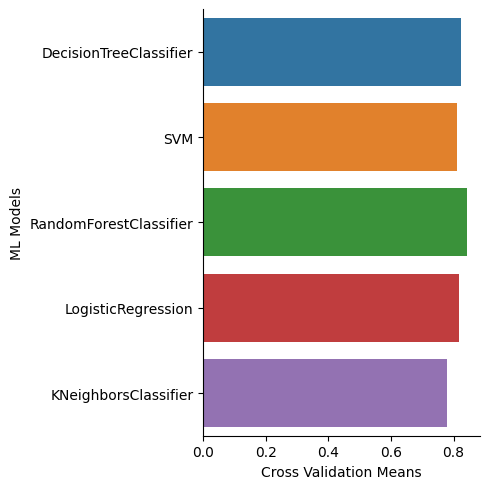

In [235]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.catplot(x="Cross Validation Means", y= "ML Models", data = cv_results,kind="bar")
#g.set_xlabel("Mean Accuracy")
plt.set_ylabels("Cross Validation Scores")
plt.show()

In [236]:
votingC = VotingClassifier(estimators=[("dt",best_estimators[0]),
                                       ("svc",best_estimators[1]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)

In [237]:
times = time.time()
votingC = votingC.fit(x_train,y_train)
print(time.time()-times)

0.3278517723083496


In [238]:
print(accuracy_score(votingC.predict(x_test),y_test))

0.8371040723981901


# Prediction and Submission

In [239]:
test_survived = pd.Series(votingC.predict(test_df), name = "Survived").astype(int)
results = pd.concat([test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

In [240]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x.head()

,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,Fsize_3,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,22.0,1,0,7.2500,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,38.0,1,0,71.2833,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,35.0,1,0,53.1000,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [241]:
x[["Age","Fare"]] = std.fit_transform(x[["Age","Fare"]])

In [242]:
x.head()

,Age,SibSp,Parch,Fare,family_size_0,family_size_1,family_size_2,Fsize_1,Fsize_2,Fsize_3,...,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_other
0,-0.536933,1,0,-0.497646,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0.655787,1,0,0.837243,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,-0.238753,0,0,-0.483574,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,0.432152,1,0,0.458180,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,0.432152,0,0,-0.480968,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [244]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.88
Testing Accuracy: % 82.81


### Hyperparameter Tuning -- Grid Search -- Cross Validation

In [245]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state,probability=True),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]
                 }

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [246]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

In [247]:
import time
times = time.time()
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], 
        cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", 
        n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])
print(time.time()-times)  

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8242424242424242
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8287878787878787
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8424242424242424
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8242424242424242
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8257575757575758
21.689594745635986


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabels'

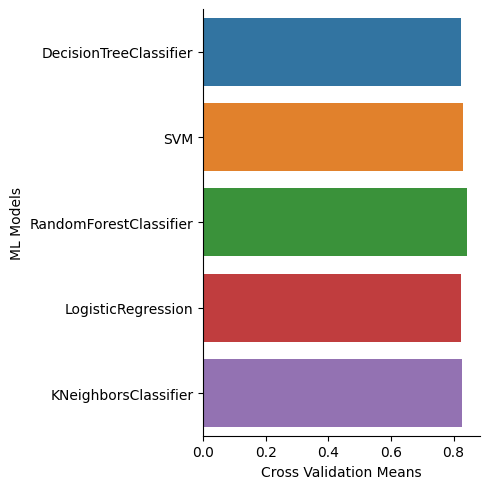

In [248]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.catplot(x="Cross Validation Means", y= "ML Models", data = cv_results,kind="bar")
#g.set_xlabel("Mean Accuracy")
plt.set_ylabels("Cross Validation Scores")
plt.show()

In [249]:
votingC = VotingClassifier(estimators=[("dt",best_estimators[0]),
                                       ("svc",best_estimators[1]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)

In [250]:
times = time.time()
votingC = votingC.fit(x_train,y_train)
print(time.time()-times)

0.18360686302185059


In [251]:
print(accuracy_score(votingC.predict(x_test),y_test))

0.8280542986425339


In [252]:
print(accuracy_score(votingC.predict(x_test),y_test))

0.8280542986425339


In [253]:
from sklearn.metrics import mean_squared_error

In [254]:
np.sqrt(mean_squared_error(y_test,votingC.predict(x_test)))

0.4146633590727134

In [255]:
np.sqrt(mean_squared_error(y_train,votingC.predict(x_train)))

0.36097511036500884